In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as opt
import pickle
import argparse
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import mglearn
import numpy as np

In [2]:
def data_analyze(train_data, train_label, test_data, test_label):
    new_train_data = None
    new_test_data = None
    print(train_data.shape)
    plt.figure()
    plt.scatter(range(len(train_data[0])), train_data[0], cmap = 'coolwarm')
    plt.show()
    print(test_data.shape)
    plt.figure()
    plt.scatter(range(len(test_data[0])), test_data[0], cmap = 'coolwarm')
    plt.show()
    print("---------------------------------------------")
    print(train_data[0].shape)
    print(list(np.unique(train_label)))
    print("---------------------------------------------")
    print(train_data[:30])
    print(train_label[:30])
    print("---------------------------------------------")
    print("PCA result")
    from sklearn.decomposition import PCA
    for i in range(0,200):
        pca = PCA(n_components=i) # 주성분을 몇개로 할지 결정
        printcipalComponents = pca.fit_transform(train_data)
        print(f"PCA:{i} 일 때, 설명 가능한 분산량 ::: {sum(pca.explained_variance_ratio_)}")
    """print("---------------------------------------------")
    print("LDA result")
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    lda = LinearDiscriminantAnalysis(n_components=1)
    # train LDA start
    new_train_data = lda.fit_transform(train_data, train_label)
    # test LDA start
    #new_test_data = lda.fit_transform(test_data, test_label)
    new_test_data = lda.transform(test_data)
    print(new_train_data.shape)
    plt.figure()
    plt.scatter(range(len(new_train_data)), new_train_data, c = train_label, cmap = 'coolwarm')
    plt.show()
    
    print(new_test_data.shape)
    plt.figure()
    plt.scatter(range(len(new_test_data)), new_test_data, c = test_label, cmap = 'coolwarm')
    plt.show()
    print("---------------------------------------------")
    
    return new_train_data, new_test_data"""

In [3]:
from sklearn.preprocessing import StandardScaler
def make_dataset(data_path):
    with open(data_path, 'rb') as handle:
        train_data = pickle.load(handle)
        train_label = pickle.load(handle)
        test_data = pickle.load(handle)
        test_label = pickle.load(handle)

    data_analyze(train_data, train_label, test_data, test_label)
    return train_data, test_data, train_label, test_label

(700, 200)


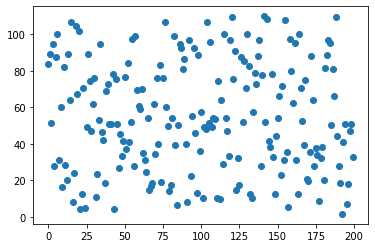

(350, 200)


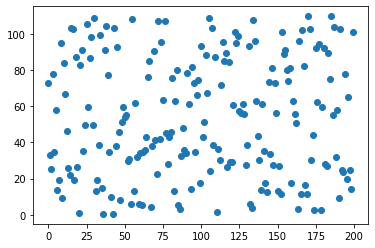

---------------------------------------------
(200,)
[0.0, 1.0]
---------------------------------------------
[[ 83.79198844  89.51681425  51.68454166 ...  47.20093522  50.86270481
   32.55305683]
 [ 56.55531428  58.36775366  29.36965321 ...  25.02209264  65.9722279
  105.84995523]
 [ 75.38613976  43.36377989  32.2630694  ...  22.05272174   7.41155015
   22.75466934]
 ...
 [ 79.0680563    9.17853072 100.50994516 ...  76.68848523  19.57855111
   56.86249482]
 [ 36.25779557  23.33756504  41.32213399 ...  83.51409889   3.56326799
    2.41082463]
 [ 91.98124007  81.86348764  63.04656696 ...   3.67167062  22.84609116
   10.0047512 ]]
[1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1.]
---------------------------------------------
PCA result
PCA:0 일 때, 설명 가능한 분산량 ::: 0
PCA:1 일 때, 설명 가능한 분산량 ::: 0.01157471527722451
PCA:2 일 때, 설명 가능한 분산량 ::: 0.022437439779945653
PCA:3 일 때, 설명 가능한 분산량 ::: 0.03367507924451039
PCA:4 일 때, 설명 가능한 분산량 ::: 0.04446110488607376


PCA:165 일 때, 설명 가능한 분산량 ::: 0.9415537170778706
PCA:166 일 때, 설명 가능한 분산량 ::: 0.9437733397305943
PCA:167 일 때, 설명 가능한 분산량 ::: 0.9459485940124572
PCA:168 일 때, 설명 가능한 분산량 ::: 0.9480626799303901
PCA:169 일 때, 설명 가능한 분산량 ::: 0.9501633453153392
PCA:170 일 때, 설명 가능한 분산량 ::: 0.952251319670377
PCA:171 일 때, 설명 가능한 분산량 ::: 0.9542865533319275
PCA:172 일 때, 설명 가능한 분산량 ::: 0.9562936420102716
PCA:173 일 때, 설명 가능한 분산량 ::: 0.9582723621935444
PCA:174 일 때, 설명 가능한 분산량 ::: 0.9602313673750728
PCA:175 일 때, 설명 가능한 분산량 ::: 0.9621860865430838
PCA:176 일 때, 설명 가능한 분산량 ::: 0.9641122044090683
PCA:177 일 때, 설명 가능한 분산량 ::: 0.9660092973022072
PCA:178 일 때, 설명 가능한 분산량 ::: 0.9678803272210956
PCA:179 일 때, 설명 가능한 분산량 ::: 0.9697256482154096
PCA:180 일 때, 설명 가능한 분산량 ::: 0.9715449674580979
PCA:181 일 때, 설명 가능한 분산량 ::: 0.9733316237502623
PCA:182 일 때, 설명 가능한 분산량 ::: 0.9751012894684856
PCA:183 일 때, 설명 가능한 분산량 ::: 0.9768187676898921
PCA:184 일 때, 설명 가능한 분산량 ::: 0.9784860404210891
PCA:185 일 때, 설명 가능한 분산량 ::: 0.9801473126238675
PCA:186 일 때, 설

In [4]:
from sklearn.model_selection import train_test_split
data_path = './data/Dataset1'
X_train, X_test, y_train, y_test = make_dataset(data_path)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
epochs = 10
model_list = [RandomForestClassifier]
score_list = []
for model in model_list:
    clf = model(n_estimators=200, max_features=200, random_state=0, verbose=True).fit(X_train, y_train)
    score_list.append(clf.score(X_test, y_test))

print(score_list)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.9457142857142857]


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [6]:
model_list = [ExtraTreesClassifier]
score_list = []
for model in model_list:
    clf = model(n_estimators=200, max_features=200, random_state=0, verbose=True).fit(X_train, y_train)
    score_list.append(clf.score(X_test, y_test))

print(score_list)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0.9742857142857143]


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [9]:
model_list = [GradientBoostingClassifier]
score_list = []
score = 0
for model in model_list:
    clf = model(n_estimators=200, max_features=200, random_state=0, criterion='squared_error', verbose=True).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_list.append(score)
print(score_list)

      Iter       Train Loss   Remaining Time 
         1           1.0727            8.48s
         2           0.9776            6.57s
         3           0.9040            5.78s
         4           0.8194            5.40s
         5           0.7482            5.20s
         6           0.6892            5.06s
         7           0.6382            4.95s
         8           0.6029            4.89s
         9           0.5621            4.84s
        10           0.5351            4.81s
        20           0.3200            4.38s
        30           0.2131            4.11s
        40           0.1600            3.84s
        50           0.1279            3.59s
        60           0.1076            3.35s
        70           0.0920            3.10s
        80           0.0780            2.85s
        90           0.0678            2.61s
       100           0.0593            2.37s
       200           0.0163            0.00s
[0.98]
